In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [4]:
dataf = pd.read_csv('merged_data_polymer.csv')

In [5]:
dataf

rho      E     mu  r   h        f1        f2        f3        f4  \
0        920.000  1.000  0.400  1   4  0.967097  0.967097  0.967107  0.967107   
1        900.000  1.380  0.420  1   4  0.991538  0.992465  0.992465  0.995096   
2       1400.000  2.800  0.400  1   4  0.996436  0.996436  0.998774  0.998774   
3       1490.000  6.000  0.350  1   4  0.986862  0.986862  0.987232  0.987232   
4       1740.000  0.800  0.490  1   4  0.967097  0.967097  0.967107  0.967107   
...          ...    ...    ... ..  ..       ...       ...       ...       ...   
176988  2142.552  2.862  0.428  5  10  0.999459  0.999461  0.999487  0.999625   
176989  3129.435  0.785  0.409  5  10  0.999767  0.999771  0.999814  0.999822   
176990  2235.680  2.719  0.370  5  10  0.999550  0.999596  0.999613  0.999630   
176991  1952.855  5.545  0.408  5  10  0.999097  0.999206  0.999209  0.999249   
176992  2666.381  2.654  0.380  5  10  0.999615  0.999627  0.999642  0.999654   

              f5  ...       f26       f27       f28       f29       f30  \
0       0.971771  ...  1.012304  1.012433  1.012433  1.022873  1.022873   
1       0.995096  ...  1.005375  1.005375  1.005572  1.005572  1.006851   
2       0.999566  ...  1.004021  1.004199  1.004199  1.005962  1.005962   
3       0.996104  ...  1.006941  1.010176  1.010176  1.010388  1.010388   
4       0.971771  ...  1.012304  1.012433  1.012433  1.022873  1.022873   
...          ...  ...       ...       ...       ...       ...       ...   
176988  0.999633  ...  1.000404  1.000438  1.000489  1.000519  1.000541   
176989  0.999828  ...  1.000158  1.000184  1.000188  1.000220  1.000240   
176990  0.999663  ...  1.000287  1.000300  1.000439  1.000451  1.000456   
176991  0.999456  ...  1.000711  1.000794  1.000928  1.000948  1.000963   
176992  0.999705  ...  1.000276  1.000306  1.000321  1.000340  1.000351   

        Unnamed: 33  Unnamed: 34  Unnamed: 35  Unnamed: 36  Unnamed: 37  
0          1.022906     1.022906     1.035504     1.035504     1.035572  
1          1.006851     1.007488     1.007488     1.007783     1.007783  
2          1.006053     1.006053     1.008941     1.008941     1.009182  
3          1.012198     1.012198     1.012348     1.012348     1.014826  
4          1.022906     1.022906     1.035504     1.035504     1.035572  
...             ...          ...          ...          ...          ...  
176988          NaN          NaN          NaN          NaN          NaN  
176989          NaN          NaN          NaN          NaN          NaN  
176990          NaN          NaN          NaN          NaN          NaN  
176991          NaN          NaN          NaN          NaN          NaN  
176992          NaN          NaN          NaN          NaN          NaN  

[176993 rows x 40 columns]

In [6]:
X = dataf[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# dataf['E']=dataf['E']*10
dataf['mu']= dataf['mu']*10000

Y = dataf[['E', 'mu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1500, batch_size=16, validation_split=0.1)

C:\Users\Ayush Rai\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 548287.3125 - val_loss: 52048.5234
Epoch 2/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 55766.8398 - val_loss: 58565.3281
Epoch 3/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 54990.9102 - val_loss: 57304.0039
Epoch 4/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 54418.6914 - val_loss: 53579.2031
Epoch 5/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 54121.7969 - val_loss: 54495.6094
Epoch 6/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 53904.9727 - val_loss: 51765.0859
Epoch 7/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 53659.0312 - val_loss: 51151.4922
Epoch 8/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 53602.8477 - val_loss: 50747.0430
Epoch 9/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 53067.9414 - val_loss: 58828.6836
Epoch 10/1500
9857/9857 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 52917.2305 - val_loss: 54890.8164
Epoch 11

In [ ]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [15]:
import pickle

In [ ]:
model_file_pickle = "polymers_ANN_model_NU_scaled.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [16]:
model_file_pickle1= "polymers_ANN_model_NU_scaled.pkl"
with open(model_file_pickle1, 'rb') as file:
    modelx = pickle.load(file)

In [17]:
y_pred1 = modelx.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [18]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred1[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred1[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred1[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred1[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred1[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred1[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error for E: 5.745321572604613
Mean Squared Error for mu: 98327.15780620852
Median Percentage Error for E: 48.073769961332246
Median Percentage Error for mu: 5.459690579463806
Mean Absolute Error for E: 1.8983602605938237
Mean Absolute Error for mu: 0.025388203042240466
Standard Deviation for E: 1.4638170967546487
Standard Deviation for mu: 0.018409296415519225
Mode Percentage Error for E: ModeResult(mode=0.0161424795616204, count=1) 
Mode Percentage Error for E: ModeResult(mode=0.004912731694229051, count=1) 
Mean Absolute percentage Error for E: 66.2760419741501
Mean Absolute percentage Error for mu: 6.188797757669907
      Actual_E  Predicted_E   Error_E  Actual_mu  Predicted_mu  Error_mu  \
0        2.974     2.478795  0.495205      0.382      0.394004  0.012004   
1        6.177     2.697903  3.479097      0.399      0.408237  0.009237   
2        7.175     2.676126  4.498874      0.394      0.406822  0.012822   
3        0.992  

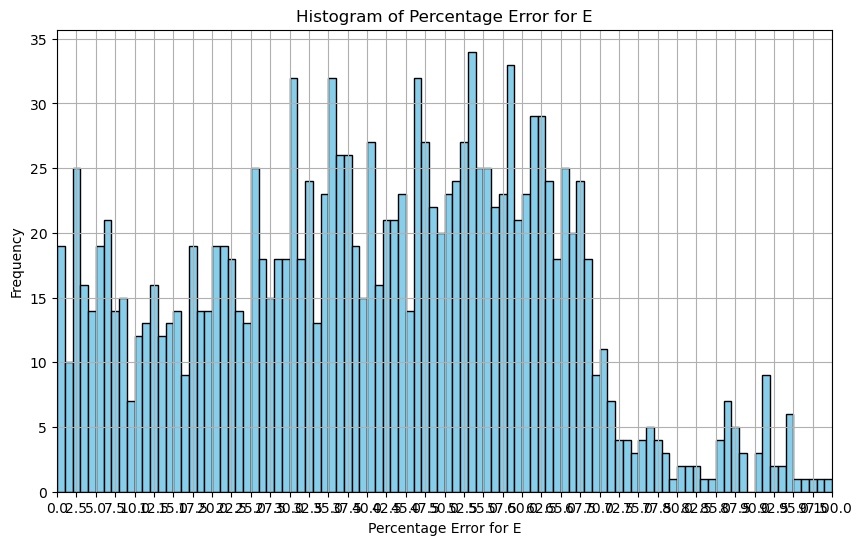

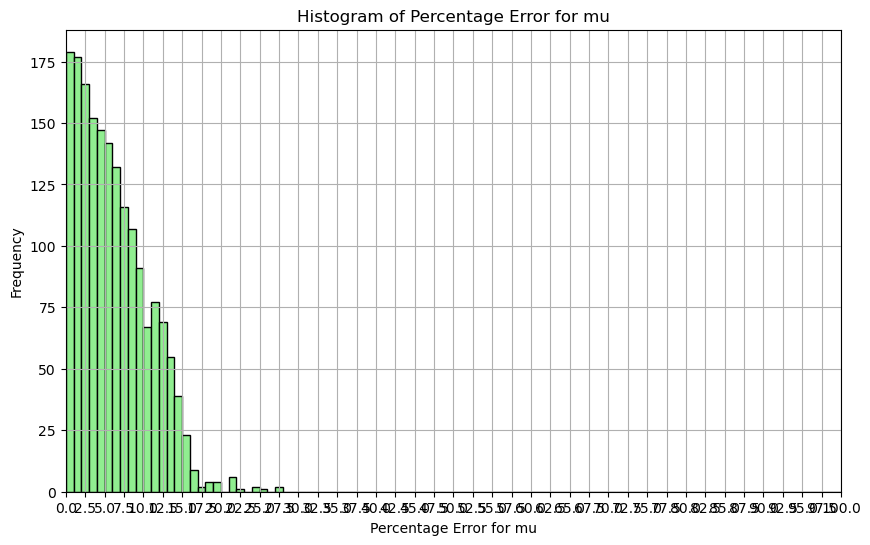

Maximum Percentage Error for E: 1095.5247409101848
Minimum Percentage Error for E: 0.0161424795616204
Maximum Percentage Error for mu: 27.489270174050628
Minimum Percentage Error for mu: 0.004912731694229051


In [19]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')